# Import Library

In [1]:
#import library
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data Loading

In [2]:
#load data
df=pd.read_csv('supermarket_sales - Sheet1.csv')

| Features | Description |
|-----------|-----------|
|Invoice id:| Computer generated sales slip invoice identification number
|Branch:| Branch of supercenter (3 branches are available identified by A, B and C).
|City:| Location of supercenters
|Customer type:| Type of customers, recorded by Members for customers using member card and Normal for without member card.
|Gender:| Gender type of customer
|Product line:| General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
|Unit price:| Price of each product in Dollar
|Quantity:| Number of products purchased by customer
|Tax:| 5% tax fee for customer buying
|Total:| Total price including tax
|Date:| Date of purchase (Record available from January 2019 to March 2019)
|Time:| Purchase time (10am to 9pm)
|Payment:| Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
|COGS:| Cost of goods sold
|Gross margin percentage:| Gross margin percentage
|Gross income:| Gross income
|Rating:| Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Data Cleaning

In [3]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

- Data Consist of 17 columns
- Data consist of 1000 row
- Date and time features should be change to time data type

In [4]:
#check null values
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

- No null values on the data

In [5]:
#check duplicate rows
df.duplicated().sum()

0

- No Duplicate values on the data

# Data Preprocessing

In [6]:
#rename data for easier coding
dfn=df.copy().rename(columns={'Invoice ID':'invoice_id','Branch':'branch', 'City':'city', 'Customer type':'cust_type', 'Gender':'gender',
       'Product line':'product_line', 'Unit price':'unit_price', 'Quantity':'quantity', 'Tax 5%':'tax', 'Total':'total', 'Date':'date',
       'Time':'time', 'Payment':'payment', 'gross margin percentage':'gross_margin_p', 'gross income':'gross_income',
       'Rating':'rating'})

In [7]:
#change data type
dfn['date']=dfn['date'].astype('datetime64[ns]')

## Create Dataframe for further purposes

In [70]:
#data frame for further purposes

dfjikan=dfn.groupby(['date']).agg({'gross_income':'sum','cogs':'sum','total':'sum'}).reset_index()
dfpl=dfn.groupby('product_line').sum()[['gross_income','cogs','total','tax']].reset_index()
dftrx=dfn.groupby('product_line').sum()[['quantity']].reset_index()
dfpy=dfn.groupby('payment').mean()[['total']]
dfgd=dfn.groupby('gender').mean()[['total']]
member = dfn[dfn['cust_type']=='Member'][['invoice_id','total']].groupby('invoice_id').sum().sample(90,random_state=555)
normal = dfn[dfn['cust_type']=='Normal'][['invoice_id','total']].groupby('invoice_id').sum().sample(90,random_state=555)

# Hypothesis Testing

Hypothesis:


- Mean of transaction value from Normal member does not have significant difference than mean of transaction value from exclusive member
- Mean of transaction value from Normal member have a significant difference than mean of transaction value from exclusive member

In [66]:
#view data
member.head()

,total
invoice_id,
756-49-0168,20.6850
838-02-1821,26.7330
390-17-5806,40.3410
573-10-3877,40.9605
608-05-3804,41.7375


In [12]:
#view data
normal.head()

,total
invoice_id,
639-76-1242,212.730
850-41-9669,709.317
702-72-0487,97.881
616-87-0016,702.219
189-17-4241,184.107


In [49]:
print('Average unit price of member buyer purchases: ${}'.format(np.round(member.total.mean())))
print('Average unit price of normal buyer purchases: ${}'.format(np.round(normal.total.mean())))

Average unit price of member buyer purchases: $337.0
Average unit price of normal buyer purchases: $354.0


In [60]:
t_stat, p_val = stats.ttest_rel(normal,member)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value

P-value: 0.6630062526796408


- The P Value is above the critical value, so we have enough proof accept null hypothesis, and reject alternative hypothesis
- This means that the mean from of Transaction Value from normal member does not have asignificant difference than the mean of transaction value from exclusive member
- If this membership program is meant to increase transaction value, then we need to adjust this membership program. But if this membership program was meant only for loyalty, then we need to observe each customer by customer id for further insight

# Visualization

- Note: Only one visualization was done here because most of the viz was done on vs code py

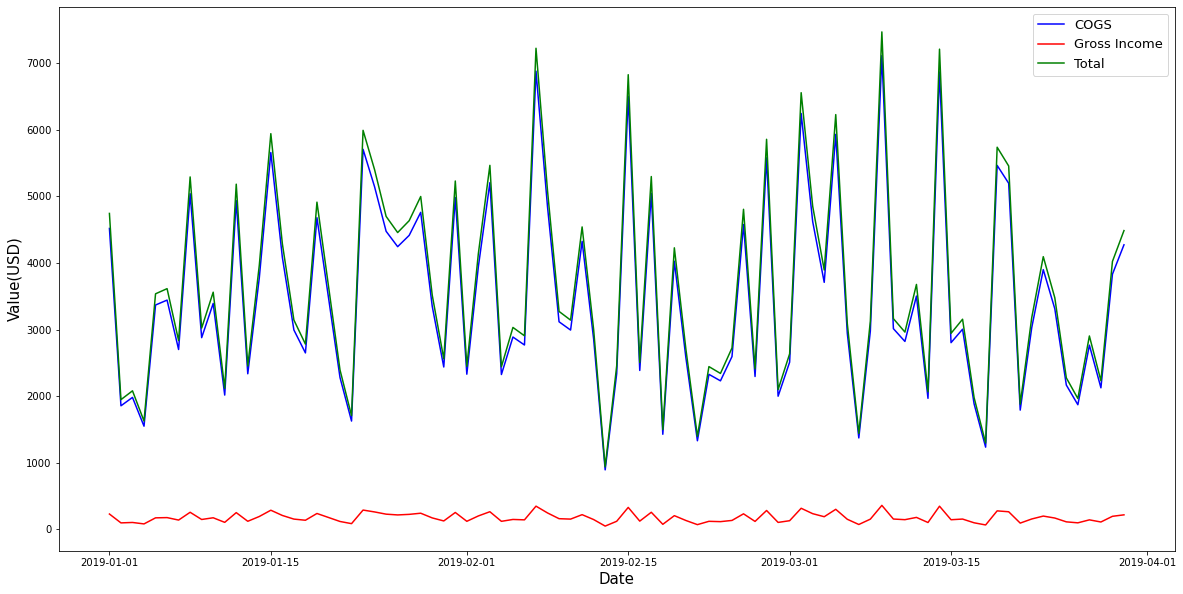

In [64]:
#create firstchart
fig, axes = plt.subplots(1,1, figsize=(20, 10))

axes.plot(dfjikan['date'],dfjikan['cogs'],color='blue',label='COGS')
axes.plot(dfjikan['date'],dfjikan['gross_income'],color='red',label='Gross Income')
axes.plot(dfjikan['date'],dfjikan['total'],color='green',label='Total')

axes.legend(prop={'size': 13})
# add label
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Value(USD)', fontsize = 15)

plt.show()